In [3]:
require(readr)
require(agricolae)
require(ggplot2)
require(gvlma)



In [4]:
library(readr)
kapil = read_csv('rcbd1.csv')
kapil



-- Column specification --------------------------------------------------------
cols(
  treatment = col_double(),
  rep = col_double(),
  gy = col_double()
)



treatment,rep,gy
<dbl>,<dbl>,<dbl>
1,1,5113
1,2,5398
1,3,5307
1,4,4678
2,1,5346
2,2,5952
2,3,4719
2,4,4264
3,1,5272


In [5]:
attach(kapil)
kapil$treatment=as.factor(kapil$treatment)
kapil$rep=as.factor(kapil$rep)
summary(kapil)

 treatment rep         gy      
 1:4       1:6   Min.   :4098  
 2:4       2:6   1st Qu.:4709  
 3:4       3:6   Median :4884  
 4:4       4:6   Mean   :4960  
 5:4             3rd Qu.:5281  
 6:4             Max.   :5952  

In [6]:
require(repr)
options(repr.plot.width=4, repr.plot.height=4)

Loading required package: repr
Warning message:
"package 'repr' was built under R version 3.6.3"

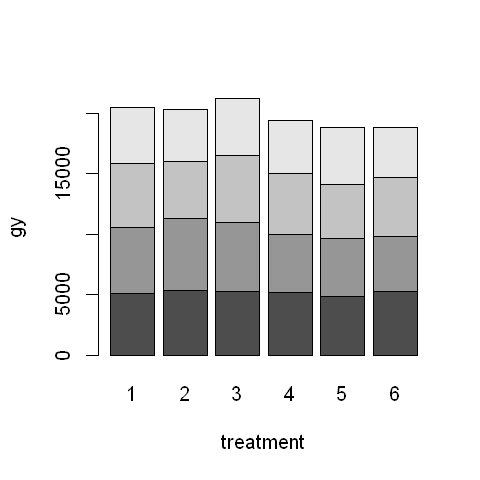

In [7]:
barplot(gy ~ rep+treatment, data = kapil)

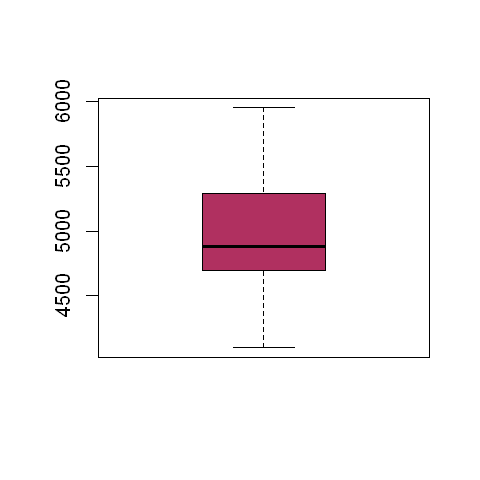

In [8]:
boxplot(gy,col = 'maroon')

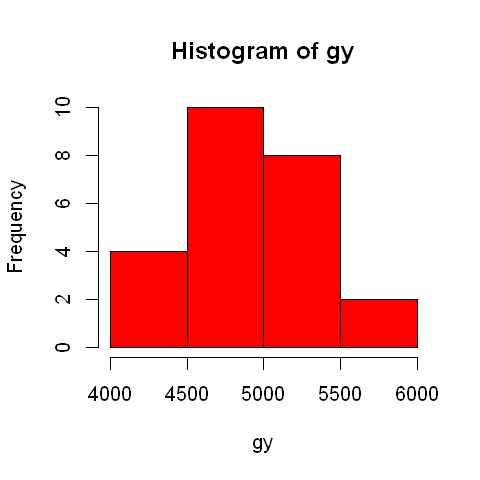

In [9]:
hist(gy,col="red")

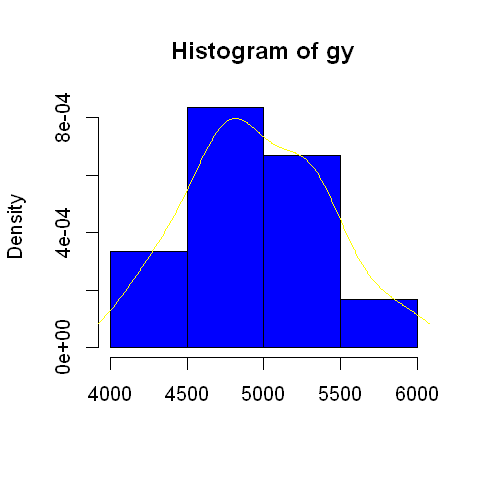

In [10]:
hist(gy,probability = 'T', main="Histogram of gy",xlab=" ",col = 'blue')
lines(density(gy),col='yellow') 

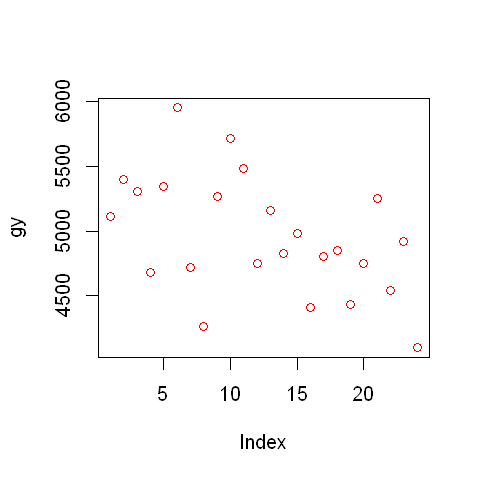

In [11]:
plot(gy,col="red")

In [12]:
require(gvlma)
fit=lm(gy~rep+treatment, data = kapil)
gvmodelFit=gvlma(fit)
gvmodelFit


Call:
lm(formula = gy ~ rep + treatment, data = kapil)

Coefficients:
(Intercept)         rep2         rep3         rep4   treatment2   treatment3  
    5323.25        55.17      -184.50      -667.67       -53.75       180.25  
 treatment4   treatment5   treatment6  
    -276.25      -416.00      -420.75  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = fit) 

                     Value p-value                Decision
Global Stat        3.05727  0.5483 Assumptions acceptable.
Skewness           0.97520  0.3234 Assumptions acceptable.
Kurtosis           0.04293  0.8359 Assumptions acceptable.
Link Function      1.91477  0.1664 Assumptions acceptable.
Heteroscedasticity 0.12437  0.7243 Assumptions acceptable.

In [13]:
summary.aov(gvmodelFit)

            Df  Sum Sq Mean Sq F value  Pr(>F)   
rep          3 1944361  648120   5.862 0.00742 **
treatment    5 1198331  239666   2.168 0.11281   
Residuals   15 1658376  110558                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [14]:
require(agricolae)
bishal=lm(gy~rep+treatment, data = kapil)
summary.aov(bishal)
summary (bishal)


            Df  Sum Sq Mean Sq F value  Pr(>F)   
rep          3 1944361  648120   5.862 0.00742 **
treatment    5 1198331  239666   2.168 0.11281   
Residuals   15 1658376  110558                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Call:
lm(formula = gy ~ rep + treatment, data = kapil)

Residuals:
   Min     1Q Median     3Q    Max 
-415.7 -215.6   21.0  156.8  627.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5323.25     203.62  26.144 6.31e-14 ***
rep2           55.17     191.97   0.287  0.77776    
rep3         -184.50     191.97  -0.961  0.35175    
rep4         -667.67     191.97  -3.478  0.00337 ** 
treatment2    -53.75     235.12  -0.229  0.82226    
treatment3    180.25     235.12   0.767  0.45519    
treatment4   -276.25     235.12  -1.175  0.25833    
treatment5   -416.00     235.12  -1.769  0.09716 .  
treatment6   -420.75     235.12  -1.790  0.09373 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 332.5 on 15 degrees of freedom
Multiple R-squared:  0.6546,	Adjusted R-squared:  0.4704 
F-statistic: 3.553 on 8 and 15 DF,  p-value: 0.01651


In [15]:
dmout = with(kapil,duncan.test(fit,"treatment", alpha = 0.05,console =TRUE))


Study: fit ~ "treatment"

Duncan's new multiple range test
for gy 

Mean Square Error:  110558.4 

treatment,  means

       gy      std r  Min  Max
1 5124.00 320.2093 4 4678 5398
2 5070.25 736.4185 4 4264 5952
3 5304.25 411.6515 4 4749 5713
4 4847.75 321.9900 4 4410 5164
5 4708.00 188.4958 4 4432 4848
6 4703.25 497.3941 4 4098 5254

Alpha: 0.05 ; DF Error: 15 

Critical Range
       2        3        4        5        6 
501.1364 525.3262 540.3590 550.6001 557.9444 

Means with the same letter are not significantly different.

       gy groups
3 5304.25      a
1 5124.00     ab
2 5070.25     ab
4 4847.75     ab
5 4708.00      b
6 4703.25      b


In [16]:
dm=with(kapil,duncan.test(gy,rep,15,110558.4,alpha = 0.05,console = TRUE))


Study: gy ~ rep

Duncan's new multiple range test
for gy 

Mean Square Error:  110558.4 

rep,  means

        gy      std r  Min  Max
1 5158.833 192.3168 6 4804 5346
2 5214.000 558.5213 6 4542 5952
3 4974.333 382.6035 6 4432 5483
4 4491.167 275.7248 6 4098 4749

Alpha: 0.05 ; DF Error: 15 

Critical Range
       2        3        4 
409.1761 428.9271 441.2013 

Means with the same letter are not significantly different.

        gy groups
2 5214.000      a
1 5158.833      a
3 4974.333      a
4 4491.167      b


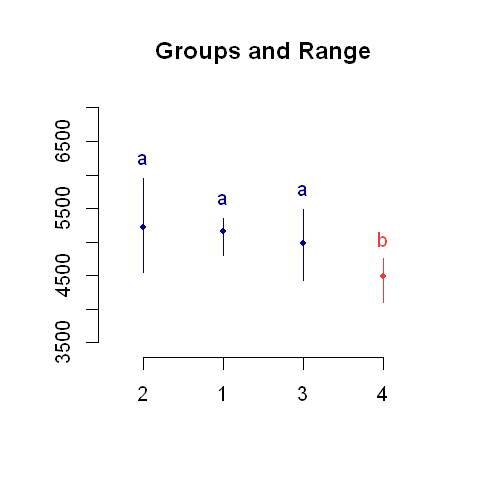

In [17]:
plot(dm)

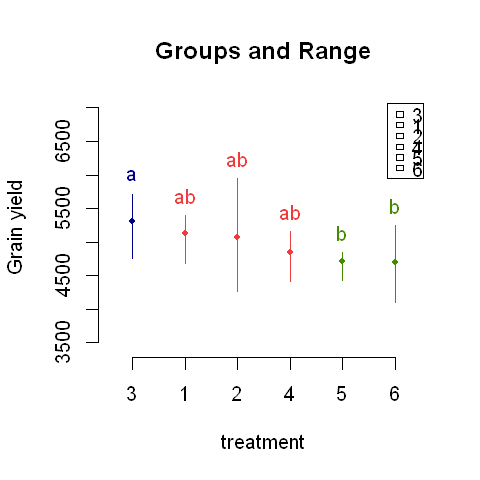

In [18]:
figdm = plot(dmout,pch=19,legend=TRUE,xlab = "treatment",ylab="Grain yield")

In [19]:
lsdout =LSD.test(fit,"treatment", alpha = 0.05,console =TRUE)


Study: fit ~ "treatment"

LSD t Test for gy 

Mean Square Error:  110558.4 

treatment,  means and individual ( 95 %) CI

       gy      std r      LCL      UCL  Min  Max
1 5124.00 320.2093 4 4769.643 5478.357 4678 5398
2 5070.25 736.4185 4 4715.893 5424.607 4264 5952
3 5304.25 411.6515 4 4949.893 5658.607 4749 5713
4 4847.75 321.9900 4 4493.393 5202.107 4410 5164
5 4708.00 188.4958 4 4353.643 5062.357 4432 4848
6 4703.25 497.3941 4 4348.893 5057.607 4098 5254

Alpha: 0.05 ; DF Error: 15
Critical Value of t: 2.13145 

least Significant Difference: 501.1364 

Treatments with the same letter are not significantly different.

       gy groups
3 5304.25      a
1 5124.00     ab
2 5070.25     ab
4 4847.75     ab
5 4708.00      b
6 4703.25      b


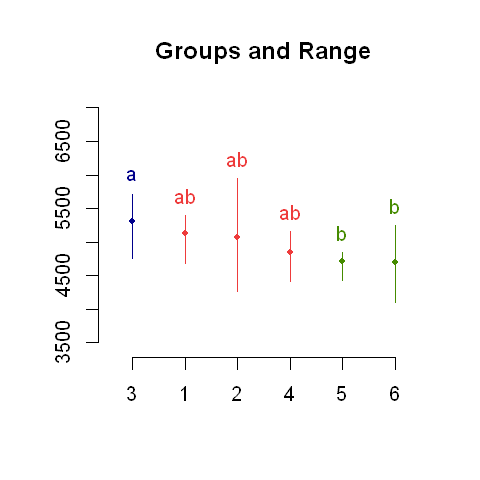

In [20]:
plot(lsdout)

In [21]:
HSD<- HSD.test(fit,"treatment", alpha=0.05, group =TRUE)
HSD

$statistics
   MSerror Df     Mean       CV      MSD
  110558.4 15 4959.583 6.704258 763.8821

$parameters
   test    name.t ntr StudentizedRange alpha
  Tukey treatment   6         4.594735  0.05

$means
       gy      std r  Min  Max     Q25    Q50     Q75
1 5124.00 320.2093 4 4678 5398 5004.25 5210.0 5329.75
2 5070.25 736.4185 4 4264 5952 4605.25 5032.5 5497.50
3 5304.25 411.6515 4 4749 5713 5141.25 5377.5 5540.50
4 4847.75 321.9900 4 4410 5164 4725.75 4908.5 5030.50
5 4708.00 188.4958 4 4432 4848 4669.00 4776.0 4815.00
6 4703.25 497.3941 4 4098 5254 4431.00 4730.5 5002.75

$comparison
NULL

$groups
       gy groups
3 5304.25      a
1 5124.00      a
2 5070.25      a
4 4847.75      a
5 4708.00      a
6 4703.25      a

attr(,"class")
[1] "group"

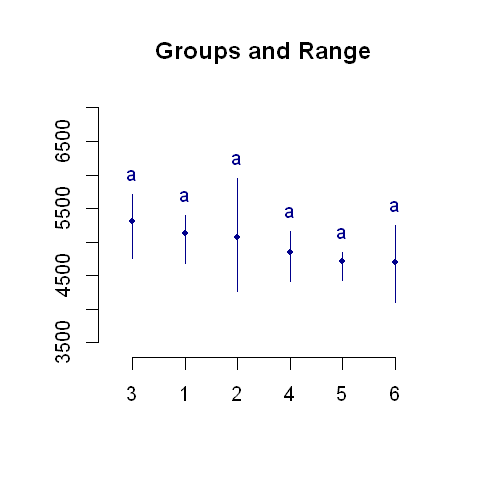

In [22]:
plot(HSD)